# THings to fix, improve, add, and general outcome of this tool
Fix:

Clean up code where necessary, especially the

### ~~1) heat map code - genarating data for the heat map, this includes segmented heatmap code~~

### ~~2) misc code section - see if necessar code in there is useful or not~~

### ~~3) biophysical properties - make sure surfaces are correct~~~

Improve:

###~1) stats genarated by minSCA section - possibly include code for conserved sequence generator (account for insertions?)~~ <-- Introduced this in another section not miniSCA

###   ~2) Heat map layout and out-put - play with heatmap setting to see if bette way of representing each heat map~ <- no other way without chnaging layout of data

Add:

  as of 05/02/24 noting to add


# General outcome:
 this tool is to perfom quick and simple bioinformatic analysis on proteins. The pipeline begins with an alignment file and visualises the conservation and mutaitons better than commercial tools. THe goal is to have (inorder of importance) a 1) colab version, 2) jupyter-notebook version, and 3) python program. This tools has no official name and is reffered to align_aminoacid

# install packages required

In [ ]:
import sys
!{sys.executable} -m pip install Bio seqlogo
!apt-get install ghostscript pdf2svg

In [ ]:
##Load Packages
#normal data manipulation packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import pylab


from matplotlib import pyplot as plt

#Biopython packages
from Bio import Phylo, AlignIO, SeqIO
from Bio.Seq import Seq
from Bio.Align import MultipleSeqAlignment
from Bio.Align.Applications import MuscleCommandline, ClustalwCommandline

# sequence alignment and phylogenetic tree
### go to MUSCLE to input fasta sequence for alignment
### https://www.ebi.ac.uk/Tools/msa/muscle/
### adapted from Mohit Poudel's guide on phylotree creation (https://medium.com/@poudelmohit59/beginners-guide-to-phylogenetic-tree-construction-using-biopython-5accbd8345a2)


In [ ]:
# Import alignment file from MUSCLE or other alignment tool
align = AlignIO.read("muscle-I20240202-023137-0249-37608114-p1m-aln-clustalw.txt", "clustal")
#print to see if data is there
print(align)

# if have single sequence. please see code after seqLogo, for construction of pre-alignment file 'Large sequnce file creation.'
# if have multiple sequences from NCBI in the following formats () please see ncbi_batchclean_workflow.txt to prep files for alignment

### Isolate Ids and use them in separate data frame (02/03/24)

In [ ]:
# Isolate id from alignment file
for record in align:
    print("%s %i" % (record.id, len(record)))

# store ids in list
ids = [ 'sp|P19560.2|POL_BIV29',
'sp|Q9TTC1.2|POL_KORV',
'sp|Q4U0X6.4|POL_HTL3P',
'sp|P25059.2|POL_BLVAU',
'sp|Q91DM0.1|POLG_PVCV1',
'sp|P03554.1|POL_CAMVS',
'sp|P03555.1|POL_CAMVC',
'sp|P33459.1|POL_CAEVC',
'sp|P18802.3|POL_HV1ND',
'sp|P16901.1|POL_OMVVS',
'sp|P12451.3|POL_HV2SB',
'sp|P15833.3|POL_HV2D2',
'sp|P18096.4|POL_HV2BE',
'sp|Q82851.1|POL_JEMBR',
'sp|P32542.1|POL_EIAVC',
'sp|P23074.3|POL_SFV1',
'sp|Q87040.1|POL_SFVCP',
'sp|Q9IDV9.3|POL_HV1YB',
'sp|P31623.2|POL_JSRV',
'sp|P19505.2|POL_SIV',
'sp|P17283.2|POL_SIVCZ',
'sp|Q1A267.4|POL_SIVMB',
'sp|Q7SQ98.2|POL_ALV',
'sp|O92815.2|POL_WDSV',
'sp|P04026.1|POL_IPHA',
'sp|P09523.1|POL_FMVD',
'sp|P15629.2|POL_SOCMV',
'sp|Q00962.1|POL_CAMVN',
'sp|P05400.1|POL_CERV',
'sp|P31792.1|POL_FENV1',
'sp|Q02964.1|POL_CAMVE',
'sp|P12502.2|POL_SIVS4',
'sp|Q89703.1|POL_CSVMV',
'sp|P11368.1|POL_IPMA',
'sp|P10272.2|POL_BAEVM',
'sp|Q02836.2|POL_SIVG1',
'sp|P03556.1|POL_CAMVD',
'sp|Q76634.3|POL_HV2UC',
'sp|P10273.2|POL_FLV',
'sp|Q7SVK7.2|POL_MLVBM',
'sp|P26808.2|POL_MLVFP',
'sp|P03360.2|POL_AVIRE',
'sp|P14350.2|POL_FOAMV',
'sp|P03369.3|POL_HV1A2',
'sp|P04585.4|POL_HV1H2',
'sp|P07572.2|POL_MPMV',
'sp|P05897.2|POL_SIVMK',
'sp|P21414.2|POL_GALV',
'sp|P26810.2|POL_MLVF5',
'sp|P08361.2|POL_MLVCB',
'sp|A1Z651.1|POL_XMRV6',
'sp|P03355.5|POL_MLVMS',
'sp|P03354.2|POL_RSVP',
'sp|Q04095.2|POL_ALVA',
'sp|P03356.3|POL_MLVAV',
'sp|P11227.2|POL_MLVRD',
'sp|P03370.2|POL_VILV',
'sp|P03362.3|POL_HTL1A',
'sp|P0C211.2|POL_HTL1L',
'sp|P22382.2|POL_SIVGB',
'sp|P14078.3|POL_HTL1C',
'sp|P35956.2|POL_VILVK',
'sp|P03371.1|POL_EIAVY',
'sp|P11204.1|POL_EIAV9',
'sp|P23427.2|POL_VILV2',
'sp|Q89928.3|POL_HV2EH',
'sp|Q74120.3|POL_HV2KR',
'sp|P20876.3|POL_HV2ST',
'sp|P27973.2|POL_SIVV1',
'sp|P27980.2|POL_SIVVG',
'sp|P17757.3|POL_HV2D1',
'sp|O12158.2|POL_HV192',
'sp|P18042.4|POL_HV2G1',
'sp|P04584.3|POL_HV2RO',
'sp|P05962.3|POL_HV2NZ',
'sp|P05895.2|POL_SIVVT',
'sp|Q8AII1.4|POL_SIVTN',
'sp|P05896.2|POL_SIVM1',
'sp|Q2F7J0.1|POL_XMRV4',
'sp|Q79666.3|POL_HV1MV',
'sp|Q77373.3|POL_HV1AN',
'sp|O91080.3|POL_HV1YF',
'sp|Q75002.3|POL_HV1ET',
'sp|Q9Q720.3|POL_HV1V9',
'sp|Q9WC63.3|POL_HV1S9',
'sp|Q9WC54.3|POL_HV1S2',
'sp|P0C6F2.1|POL_HV1LW',
'sp|P35963.3|POL_HV1Y2',
'sp|O93215.4|POL_HV190',
'sp|O41798.3|POL_HV19N',
'sp|O89290.3|POL_HV193',
'sp|Q2F7J3.1|POL_XMRV3',
'sp|Q9QSR3.3|POL_HV1VI',
'sp|P24740.3|POL_HV1U4',
'sp|Q9QBY3.3|POL_HV196',
'sp|Q9QBZ1.3|POL_HV1M2',
'sp|Q9QBZ5.3|POL_HV1MP',
'sp|P05961.3|POL_HV1MN',
'sp|P20875.3|POL_HV1JR',
'sp|P12499.3|POL_HV1Z2',
'sp|Q73368.3|POL_HV1B9',
'sp|P24107.3|POL_HV2CA',
'sp|P04588.3|POL_HV1MA',
'sp|P20892.3|POL_HV1OY',
'sp|P12497.4|POL_HV1N5',
'sp|P05959.3|POL_HV1RH',
'sp|P04587.3|POL_HV1B5',
'sp|Q9QBZ9.2|POL_HV197',
'sp|P03366.3|POL_HV1B1',
'sp|P03367.3|POL_HV1BR',
'sp|P04589.3|POL_HV1EL',
'sp|Q7TD08.1|POL_CYLCV',
'sp|P11283.2|POL_MMTVC',
'sp|O89940.3|POL_HV1SE',
'sp|O92956.2|POL_RSVSB',
'sp|P31822.1|POL_FIVT2',
'sp|P19028.1|POL_FIVSD',
'sp|P27502.1|POL_RTBVP',
'sp|P04025.2|POL_SRV1',
'sp|P03365.3|POL_MMTVB',
'sp|P03361.2|POL_BLVJ',
'sp|Q0R5R2.3|POL_HTL32',
'sp|P03363.4|POL_HTLV2',
'sp|P27401.2|POL_SFV3L',
'sp|Q1A249.3|POL_SIVEK',
'sp|P03364.3|POL_SMRVH',
'sp|P51517.2|POL_SRV2',
'sp|P16088.1|POL_FIVPE',
'sp|O93209.1|POL_FFV',
'sp|P12894.1|POL_IPMAI',
'sp|P03359.2|POL_WMSV',
'sp|P26809.2|POL_MLVFF',
'sp|P23426.2|POL_VILV1',  ]

#### Turn Bio results into pandas df, print the two types to get an idea of how pandas arranges the data##

In [ ]:
df = pd.DataFrame(data = align)
# append and save dataframe, Ordering of ids will depend on the origional clustal file ordering
df['Ids'] = ids
#print to see df
print(df)

ValueError: Length of values (133) does not match length of index (5)

## Concensus seq generation, conserved, and mutated residue stats

### (majority rules ) Concensus seq generation and conserved

In [ ]:
# quick stats on alignment
# generates majority rules concencuss sequence/residues in their position with highest freq
stat = df.describe()#.to_csv('./descibe.csv')
# transpose from wide to long df
s = stat.transpose()
# replace inserts with non amino acid letter
ddf = s.replace('-', 'X')
#remove 'inserts'
df1 = ddf.drop(ddf[ddf['top'] == 'X'].index)
#drop unecessary columns
df1.drop(list(df1.filter(regex='count|unique|freq')), axis=1, inplace=True)
# move back to wide df
d = df1.transpose()
# remove unecessary column
d.drop(list(d.filter(regex='Ids')), axis=1, inplace=True)
#save conserved residues and positions to file
d.to_csv('describe.csv')
#turn list from above code to dict for heatmaps
df_dict = d.to_dict('list')
print(df_dict)

{0: ['M'], 1: ['K'], 2: ['K'], 3: ['L'], 4: ['L'], 5: ['K'], 6: ['S'], 7: ['V'], 8: ['L'], 9: ['V'], 10: ['F'], 11: ['A'], 12: ['A'], 13: ['L'], 15: ['G'], 16: ['S'], 17: ['A'], 18: ['S'], 19: ['S'], 20: ['L'], 21: ['Q'], 22: ['A'], 23: ['L'], 24: ['P'], 25: ['V'], 26: ['G'], 27: ['N'], 28: ['P'], 29: ['A'], 30: ['E'], 31: ['P'], 32: ['S'], 33: ['L'], 34: ['M'], 35: ['I'], 36: ['D'], 37: ['G'], 38: ['I'], 39: ['L'], 40: ['W'], 41: ['E'], 42: ['G'], 43: ['F'], 44: ['G'], 45: ['G'], 46: ['D'], 47: ['P'], 48: ['C'], 49: ['D'], 50: ['P'], 51: ['C'], 52: ['T'], 53: ['T'], 54: ['W'], 55: ['C'], 56: ['D'], 57: ['A'], 58: ['I'], 59: ['S'], 60: ['L'], 61: ['R'], 62: ['A'], 63: ['G'], 64: ['Y'], 65: ['Y'], 66: ['G'], 67: ['D'], 68: ['F'], 69: ['V'], 70: ['F'], 71: ['D'], 72: ['R'], 73: ['V'], 74: ['L'], 75: ['K'], 76: ['T'], 77: ['D'], 78: ['V'], 79: ['N'], 80: ['K'], 81: ['E'], 82: ['F'], 83: ['Q'], 84: ['M'], 85: ['G'], 86: ['A'], 87: ['A'], 88: ['P'], 89: ['T'], 90: ['G'], 93: ['T'], 94: ['A'

### Mutated residues

In [ ]:
# create df with mutated residues
dt = df.loc[:,~(df == df.iloc[0]).all()] #remove conserved residues from sequence
#save only mutated residues to csv file
dt.to_csv('xticksmutations_2.csv')
dt

,7,9,10,12,13,14,15,17,18,21,...,373,374,379,380,381,383,385,389,396,397
0,V,A,F,V,L,-,G,A,S,H,...,I,V,Y,A,V,V,T,D,N,A
1,V,V,F,A,L,-,S,A,S,Q,...,I,V,Y,A,V,V,T,D,N,A
2,V,V,F,A,L,-,S,A,S,Q,...,I,V,Y,A,V,V,T,D,N,A
3,A,L,F,T,T,-,G,A,L,Q,...,L,I,W,S,I,G,A,N,N,A
4,A,L,S,A,F,A,G,V,G,Q,...,L,V,W,S,L,A,A,N,S,G


## create phylo tree

### UPGMATree

In [ ]:
# use the above alignemnt file to create a phylogeny tree
# Open and initiate the Distance Calculator using the Identity model
from Bio.Phylo.TreeConstruction import DistanceCalculator
calculator = DistanceCalculator('identity')

# Write the Distance Matrix
distance_matrix = calculator.get_distance(align)
print(distance_matrix)

# Create a DistanceTreeConstructor object
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor()
# Construct the phlyogenetic tree using UPGMA algorithm
UPGMATree = constructor.upgma(distance_matrix)

In [ ]:
# Make a better looking tree using the features of matplotlib

fig = plt.figure(figsize=(20, 12), dpi=300) # create figure & set the size
matplotlib.rc('font', size=18)              # fontsize of the leaf and node labels
matplotlib.rc('xtick', labelsize=16)       # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=16)       # fontsize of the tick labels
axes = fig.add_subplot(1, 1, 1)

# drawing the tree
Phylo.draw(UPGMATree, axes=axes)
fig.savefig("UPGMATree")


In [ ]:
# find common ancestro of two clades
#select animals
UPGMATree.common_ancestor('Dog','Masked_Palm_Civet')
#get terminald
UPGMATree.count_terminals()
# get non terminals
UPGMATree.get_nonterminals()
# branch length of ancestors
UPGMATree.total_branch_length()

### NJTree (Neigbour joining algorithm)

In [ ]:
# Construct the phlyogenetic tree using NJ algorithm
NJTree = constructor.nj(distance_matrix)
# Draw the phlyogenetic tree using terminal
Phylo.draw_ascii(NJTree)

In [ ]:
# Make a better looking tree using the features of matplotlib

fig = plt.figure(figsize=(28, 11), dpi=300) # create figure & set the size
# matplotlib.rc('font', size=18)              # fontsize of the leaf and node labels
# matplotlib.rc('xtick', labelsize=16)       # fontsize of the tick labels
# matplotlib.rc('ytick', labelsize=16)       # fontsize of the tick labels


axes = fig.add_subplot(1, 1, 1)
Phylo.draw(NJTree, axes=axes)

fig.savefig("NJTree")

### Import multipul alignment files.

In [ ]:
##multipule data file
align1 = AlignIO.read("clustalo-I20200406-012943-0897-1425048-p2m.clustal_num", "clustal")
print(align1)
align2 = AlignIO.read("clustalo-I20200406-014019-0645-26828020-p2m.clustal_num", "clustal")
print(align2)
align3 = AlignIO.read("clustalo-I20200406-013054-0367-48373588-p2m.clustal_num", "clustal")
print(align3)
align4 = AlignIO.read("clustalo-I20200406-013931-0129-80505547-p2m.clustal_num", "clustal")
print(align4)
align5 = AlignIO.read("complete.clustal_num", "clustal")
print(align5)

## Statistical Coupling Analysis (SCA)
##https://reynoldsk.github.io/pySCA/
##https://github.com/ranganathanlab/pySCA
##https://github.com/reynoldsk/pySCA
##https://ranganathanlab.gitlab.io/pySCA/
##https://github.com/davidkastner/evoAllostery

# HeatMaps
    1) Global conserved residues
    2) Targeted conserved residues
    3) miniSCA


##1) Global conserved residues

##Seqmented Heatmap

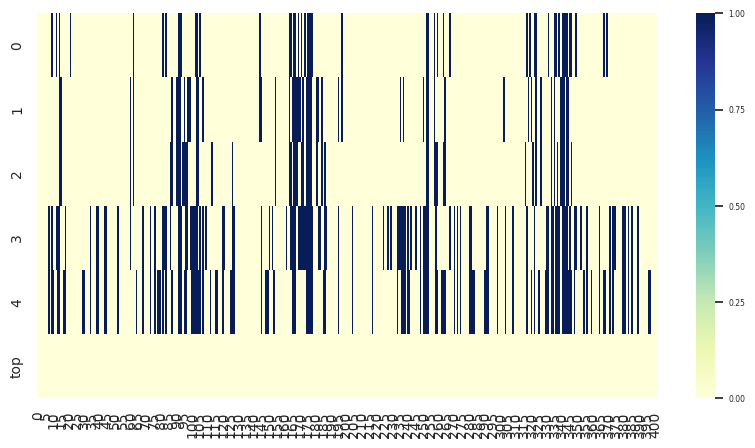

In [ ]:
# turn dictionary of conserved residues into df
vals = df_dict
#search of vals in origional df, turing them into boolean (True or False)
ff = df.isin(vals)
#Looks for matching aminoacids, using reverse find function. True = Conserved False = Substituted

#Look for conservation across all rows and columns
ft = df.eq(d.iloc[:, :], axis=1) #i.e. searcdhing for mutation/differences in sequence between origional df and mutated df
#Turn boolean values into numeric values by multiplying by 1
ft.replace({False: 0, True: 1}, inplace=True)
# create (segmented) df of positive/true and negative/false values for heatmap plotting
tt = ft.eq(ff.iloc[:, :], axis=1)

#Use new data frame of 1 and 0 to populate heat map (seaborn)
plt.figure(figsize=(10,5))
#y_axis_labels = ids # manual input for labels for y-axis
g = sns.heatmap(tt,cmap='YlGnBu')
#g = sns.heatmap(tt, yticklabels=y_axis_labels,cmap='YlGnBu')
sns.set(font_scale=3)
g.tick_params(labelsize=10)
#pp.savefig('Spike_heatmap_conserved.pdf',bbox_inches='tight')

##Parallel Heatmap

## needs fixing? (01/03/24)

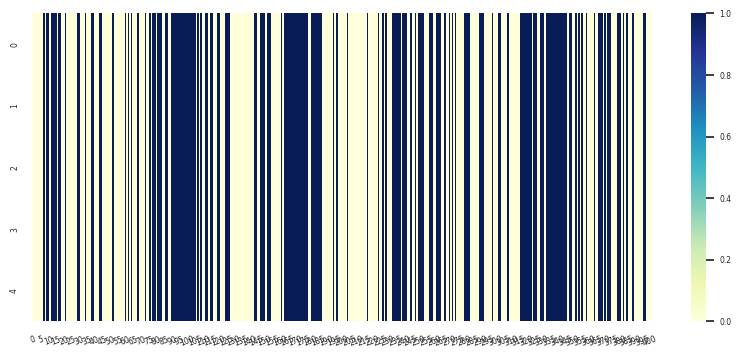

In [ ]:
#Looks for matching aminoacids, using reverse find function. True = substituted False = Same
#i.e. searcdhing for mutation/differences in the collagen
#Look for conservation across all rows and columns
ft = df.eq(dt.iloc[:, :], axis=1)

#Turn boolean values into numeric values by multiplying by 1
#Use new data frame of 1 and 0 to populate heat map (seaborn)
plt.figure(figsize=(10,4))
#x_axis_labels = [] # labels for x-axis
#y_axis_labels = [] # manual input for labels for y-axis
sns.set(font_scale=0.5)
g = sns.heatmap(ft,cmap='YlGnBu')
#g = sns.heatmap(ft, yticklabels=y_axis_labels,cmap='YlGnBu')
#g.tick_params(labelsize=10)
#plt.xticks(rotation=20)
plt.show()
#pp.savefig('Spike_heatmap_conserved.pdf',bbox_inches='tight')


##2) Targeted (conserved) residues

### try add multiple and or consective (motif) search option (02/03/24)

<Axes: >

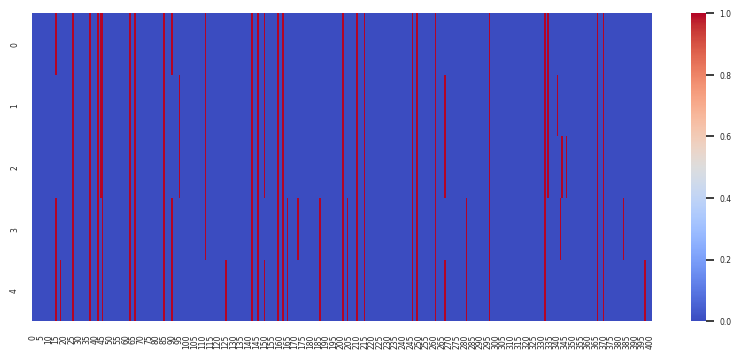

In [ ]:
#search of particular residues in th eorigional data frame
#uu = df.loc[0:].eq('G') # not sure what the difference of this compared to below command
uu = df.iloc[:].eq('G') # search for particular residue in df and save as new df for plotting
#x_axis_labels =  # labels for x-axis
y_axis_labels = ids # manual input for labels for y-axis

plt.figure(figsize=(10,4))
#sns.heatmap(uu, cmap="coolwarm", yticklabels=y_axis_labels)
sns.heatmap(uu, cmap="coolwarm")

## 3) miniSCA

##### need to remove '-' (insertions) in the sequence to unbias the output (1D heatmap) (02/03/24)

In [ ]:
#calculate statistics of amino acids in each position
stat1 = []
stat2 = []

# Iterate through each position (amino acid) in the protein (n positions)
for i in range(402): # THIS NEED TO MATCH THE NUMEBR OF AMINO ACIDS IN PROTEIN
# Calculate the frequency of each amino acid at the current position
   #stat1
   #ss = df[i].value_counts()
# Calculate the frequency of each amino acid at the current position (normalized)
   #stat2
   #ss = df[i].value_counts(normalize=True) # prints list of amino acid frequencies
    ss = df[i].value_counts(normalize=True).tolist() # as the line above but transposed values
    if i not in ss:
    #stat1.append(ss)
      stat2.append(ss)

# Convert the stat2 list of lists into a DataFrame
#pdstat1 = pd.DataFrame(stat1)
pdstat2 = pd.DataFrame(stat2)
pdstat2.transpose()
# Optionally, you can save the DataFrame to CSV files if needed
# pdstat1.to_csv('PRO_aminoacidSTAT.csv')
# pdstat2.to_csv('PRO_aminoacidSTAT_norm.csv')

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,1.0,1.0,1.0,1.0,1.0,1.0,0.6,1.0,0.4,0.8,...,1.0,1.0,1.0,1.0,0.8,0.8,1.0,1.0,1.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,0.4,0.2,...,NaN,NaN,NaN,NaN,0.2,0.2,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Plot 1D heatmap of stats generated from above

In [ ]:
ar2 = pdstat2.transpose()
#ar2 = pdstat1.transpose()
plt.figure(figsize=(3,40))
#sns.heatmap(ft, cmap='YlGnBu')
g = sns.heatmap(ar2, yticklabels=y_axis_labels, cmap='YlGnBu')
#pp.savefig('MOMP_conserved.pdf',bbox_inches='tight')

In [ ]:
#Searching for values equal to 1, i.e, conserved amino acids in all aligned protein
tt = pdstat2[pdstat2.eq(1.0000).any(axis=1)] #seaches based on the frequency list
t = tt.transpose().dropna()
column_names = list(t.columns.values)
#chqnges values of amino acids in the conserved indexes
#indices = [3,  15,  17,  23,  33,  37,  39,  42,  74,  94,  95, 114, 115,
#            116, 117, 121, 122, 150, 152, 153, 177, 181, 188, 200, 238]
indices = column_names
dff1 = df
dff1.T.loc[indices, 0: 5] = 1.0000

print(dff1.head(16))


   0    1    2    3    4    5    6    7    8    9    ...  392  393  394  395  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   
1  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   
2  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   
3  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   
4  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   

   396  397  398  399  400 401  
0  1.0  1.0  1.0  1.0  1.0   F  
1  1.0  1.0  1.0  1.0  1.0   F  
2  1.0  1.0  1.0  1.0  1.0   F  
3  1.0  1.0  1.0  1.0  1.0   F  
4  1.0  1.0  1.0  1.0  1.0   F  

[5 rows x 402 columns]


# Biophysical properties

## After loading in packages, create aminop acid libraries in the order stated below
##Library 1 - Inhouse wild card values [Jj,Oo,Xx,Uu] Note B and Z can be used but for now (ver 1.2) only
##4 out of 6 wilde card are chooses. Please see document (Inhouse_wildcard_basic.txt for explination of library


AcidSma = 'D', 'S'

AcidLarge = 'E'


BasicSma = 'H'

BasicLarge = 'R','K'


HPolSma = 'T'

HPolLarge = 'N', 'Q'


HnonSma = 'G', 'P', 'A', 'V'

HnonLarge = 'C', 'I', 'L', 'M', 'F', 'Y', 'W'


  AcidicSma = 'j'

  AcidicLarge = 'J'

  BasicSma = 'o'

  BasicLarge = 'O'

  HPolSma = 'x'

  HPolLarge = 'X'

  HnonSma = 'u'

  HnonLarge = 'U'

#### re-arrange physical bulkiness of residues based on Van der Waals values (02/03/24)

In [ ]:
## Amino acids are classified into groups on physical bulkiness
AcidSma = 'D', 'S'
AcidLarge = 'E'

BasicSma = 'H'
BasicLarge = 'R','K'

HPolSma = 'T'
HPolLarge = 'N', 'Q'

HnonSma = 'G', 'P', 'A', 'V'
HnonLarge = 'C', 'I', 'L', 'M', 'F', 'Y', 'W'

In [ ]:
##amino acid groups are assigned uniq identifier
AcidSma = 'j'
AcidLarge = 'J'
BasicSma = 'o'
BasicLarge = 'O'
HPolSma = 'x'
HPolLarge = 'X'
HnonSma = 'u'
HnonLarge = 'U'

In [ ]:
# creation of correlation matrix
#http://what-when-how.com/molecular-biology/van-der-waals-surface-volume-molecular-biology/

#Van der Waals surface of Average volume of buried residue ( A residue is defined as buried if 5% or less of its potential accessible surface area is available to solvent contact)

data = {'A':  [91.5],
'R':  [202],
'N':  [135.2],
'D':  [124.5],
'C':  [105.6],
'E':  [161.1],
'Q':  [155.1],
'G':  [66.4],
'H':  [167.3],
'I':  [168.8],
'L':  [167.9],
'K':  [171.3],
'M':  [170.8],
'F':  [203.4],
'P':  [129.3],
'S':  [99.1],
'T':  [122.1],
'W':  [237.6],
'Y':  [203.6],
'V':  [141.7],
        }

data
# creation of DataFrame
df = pd.DataFrame(data)
#matrix = read_csv('VdWRadiusMatrix.csv')
corrM = df.corr()


In [ ]:
# scoring function of biophysical attributes
AcidicSma = -2
AcidicLarge = -2
BasicSma = 2
BasicLarge = 2
HPolSma = 0.5
HPolLarge = 0.5
HnonSma = -0.5
HnonLarge = -0.5
Nan = 0

### Store important residue positions and associated Id

#### is this necessary? (02/03/24)

In [ ]:
#Save conserved amino acids
xfx = df[ft.loc[:,] == 0] # saves mutated residues with as as is and residue location
conRes = xfx.dropna(axis=1, how='all')

conRes['Ids'] = ids
#Note, to get conserved sequence, use df.describe() on origional data frame

#save targetd group from Heat map 2
#xff = uu[uu.loc[:,] == 1]
#targetRes = xff.dropna(axis=1, how='all')
#targetRes['Ids'] = ids

#save mutated residues
xfx = ft[ft.loc[:,] == 1] # saves mutated residues with as 1's and residue location
xfx = df[ft.loc[:,] == 1] # saves mutated residues with as as is and residue location
muRes = xfx.dropna(axis=1, how='all')
muRes['Ids'] = ids

ValueError: Length of values (133) does not match length of index (1)

In [ ]:
# convert amino acids into pysiochemical properties
#Conserved residues only
cc = conRes.replace(['R', 'K'], BasicLarge).replace(['C', 'I', 'L', 'M', 'F', 'Y', 'W'], HnonLarge).replace(['G', 'P', 'A', 'V'],HnonSma).replace(['D', 'S'], AcidSma).replace(['E'], AcidLarge).replace(['T'], HPolSma).replace(['H'], BasicSma).replace(['N', 'Q'], HPolLarge)
# whole dataframe
cc2 = df.replace(['R', 'K'], BasicLarge).replace(['C', 'I', 'L', 'M', 'F', 'Y', 'W'], HnonLarge).replace(['G', 'P', 'A', 'V'],HnonSma).replace(['D', 'S'], AcidSma).replace(['E'], AcidLarge).replace(['T'], HPolSma).replace(['H'], BasicSma).replace(['N', 'Q'], HPolLarge)
df1 = pd.DataFrame(cc2)
df1['Ids'] = ids
print(df1)
#df.to_csv('BulkySpike.csv')


NameError: name 'conRes' is not defined

In [ ]:
cc = conservedRange2.replace(['R', 'K'], BasicLarge).replace(['C', 'I', 'L', 'M', 'F', 'Y', 'W'], HnonLarge).replace(['G', 'P', 'A', 'V'],HnonSma).replace(['D', 'S'], AcidicSma).replace(['E'], AcidicLarge).replace(['T'], HPolSma).replace(['H'], BasicSma).replace(['N', 'Q'], HPolLarge).replace(['N', 'Q'], HPolLarge).replace(['-'], Nan)
#print(cc)
df = pd.DataFrame(cc)
#df['Ids'] = RTids
print(df)
pp.figure(figsize=(30,16))
sns.heatmap(df)
#df.to_csv('RT_BigCON_sizes.csv')

NameError: name 'conservedRange2' is not defined

# SeqLogo

https://www.tije.co/post/seqlogo_from_multiple_sequence_alignment/

In [ ]:
import seqlogo
# Load in MUSCLE alignment data or use existing data frame
#align = AlignIO.read("muscle-I20240202-023137-0249-37608114-p1m-aln-clustalw.txt", "clustal")
align = align

In [ ]:
# define seqlogo function
def alnSiteCompositionDF(aln, characters="ACDEFGHIKLMNPQRSTVWY"):
  alnRows = aln.get_alignment_length()
  compDict = {char:[0]*alnRows for char in characters}
  for record in aln:
    header = record.id
    seq = record.seq
    for aaPos in range(len(seq)):
      aa = seq[aaPos]
      if aa in characters:
        compDict[aa][aaPos] += 1
  return pd.DataFrame.from_dict(compDict)

In [ ]:
# create seqlogo
momp = alnSiteCompositionDF(align) # apply above function to df
momp_alignmentSiteFreqDF = momp.div(momp.sum(axis=1), axis=0) # add normalise statistic values to df from seqlogo function
#create seqlogo
momp_alignmentSiteFreqSeqLogo = seqlogo.Ppm(momp_alignmentSiteFreqDF,alphabet_type="AA")
seqlogo.seqlogo(momp_alignmentSiteFreqSeqLogo, ic_scale = True, format = 'svg', size = 'xlarge',filename = './MompSeqlogo.svg')

# Large sequnce file creation.


In [ ]:
#import our three important packages
from Bio import SeqIO
from Bio import AlignIO
from Bio import Phylo

In [ ]:
# import sequence sand specify format
p1 = SeqIO.read("seq1.fasta", "fasta")
p2 = SeqIO.read("seq2.fasta", "fasta")
p3 = SeqIO.read("seq3.fasta", "fasta")
p4 = SeqIO.read("seq4.fasta", "fasta")
...
p12 = SeqIO.read("seq12.fasta", "fasta")

In [ ]:
# assidn easy to read id for phylotree
p1.id = 'Animal_1'
p2.id = 'Animal_2'
p3.id = 'Animal_3'
p4.id = 'Animal_4'
...
p12.id = 'Animal_12'

In [ ]:
# create combined sequence file
combined_sequence = SeqIO.write([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12], "combined_sequence.fasta", "fasta")

# Misc code

In [ ]:

#remove insertions from the seuence (-)
dd3 = df.loc[:,~(df == df.iloc[0]).all()]
dd3.head()
#dd1 = df1.loc[:,~(df1 == df1.iloc[0]).all()]
#dd2 = df2.loc[:,~(df2 == df2.iloc[0]).all()]

,0,1,2,3,4,5,6,7,8,9,...,525,526,527,528,529,530,531,532,533,Ids
0,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,sp|P19560.2|POL_BIV29
1,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,sp|Q9TTC1.2|POL_KORV
2,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,sp|Q4U0X6.4|POL_HTL3P
3,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,sp|P25059.2|POL_BLVAU
4,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,sp|Q91DM0.1|POLG_PVCV1


#### have incorperated the frrst bit of code but not sure about the latter (02/03/24)

In [ ]:
#Searching for values equal to 1, i.e, conserved amino acids in all 7 families
tt = pdstat2[pdstat2.eq(1.0000).any(axis=1)] #seaches based on the frequency list

#Looks for matching aminoacids, using reverse find function. True = substituted False = Same
#i.e. searcdhing for mutation/differences in the collagen
#Look for conservation across all rows and columns
ft = df1.eq(dd1.iloc[:, :], axis=1)
ft.replace({False: 1, True: 0}, inplace=True)
ff = ft.T[ft.T.eq(1.0000).any(axis=1)]
new = ff.replace([0], 1.0000)
new.index # gets index of conserved amino acids
# arr2

Int64Index([  0,   1,   2,   3,   4,   5,   6,   8,  11,  16,
            ...
            390, 391, 392, 393, 394, 395, 398, 399, 400, 401],
           dtype='int64', length=221)

In [ ]:
#slicing df
ddf = df1.iloc[0:7, 10:15]
ddf
#concat slices
ddf3 = pd.concat([ddf, ddf2], axis=1)
ddf3
# arr2.loc[df1.index[6], :] # not sure what this does

,10,11,12,13,14,16,17,18,19,20,21,22,23,24
0,P,E,N,P,Y,T,P,V,F,A,I,K,K,K
1,Y,D,G,P,G,N,P,V,F,P,V,K,K,P
2,S,L,S,Q,W,S,P,V,F,V,I,R,K,K
3,S,N,S,P,W,T,P,V,F,V,I,K,K,K
4,Q,N,S,P,M,T,P,V,Y,P,V,P,K,P
5,C,Q,S,P,W,T,P,L,L,P,V,K,K,P
6,T,S,S,P,C,T,P,I,L,P,V,L,K,K
